In [13]:
import matplotlib.pyplot as plt
from matplotlib.collections import LineCollection
%matplotlib inline
from numpy import random
import seaborn as sns
import pandas as pd
import numpy as np
import scipy as sc
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import MinMaxScaler

In [14]:
data_path = 'Customer-Analysis.csv'

In [15]:
def load_original_data(path):            
    return pd.read_csv(path)

In [16]:
def standardized_column_names(df):                              
    df.columns = [i.lower().replace(" ","_") for i in df.columns]
    return df

In [17]:
def droping_columns(df):                                        
    df.drop(columns = ["unnamed:_0", "customer", "vehicle_type"], inplace = True)
    return df

In [18]:
def droping_duplicates(df):                      
    df = df.drop_duplicates().reset_index()
    df.drop(columns = ["index"], inplace = True)
    return df

In [19]:
def replacing_nulls(df):                      
    df['number_of_open_complaints'] = df['number_of_open_complaints'].fillna(value = df['number_of_open_complaints'].median())
    df['months_since_last_claim'] = df['months_since_last_claim'].fillna(value = df['months_since_last_claim'].mean())
    return df

In [20]:
def region(df):                              
    if df['state'] != df['state']:            
        return df 
    else:
        dct = {'California':'west','Washington':'east','Oregon':'north west','Arizona':'central','Nevada':'central'}
        df['state'] = dct[df['state']]
        return df

### Pipeline Controlling

In [21]:
df = load_original_data(data_path)\
.pipe(standardized_column_names)\
.pipe(droping_columns)\
.pipe(droping_duplicates)\
.pipe(replacing_nulls)

In [22]:
df['effective_to_date']= pd.to_datetime(df['effective_to_date']) 


In [23]:
df.head()

,state,customer_lifetime_value,response,coverage,education,effective_to_date,employmentstatus,gender,income,location_code,...,months_since_policy_inception,number_of_open_complaints,number_of_policies,policy_type,policy,renew_offer_type,sales_channel,total_claim_amount,vehicle_class,vehicle_size
0,Arizona,4809.216960,No,Basic,College,2011-02-18,Employed,M,48029,Suburban,...,52,0.0,9,Corporate Auto,Corporate L3,Offer3,Agent,292.800000,Four-Door Car,Medsize
1,California,2228.525238,No,Basic,College,2011-01-18,Unemployed,F,0,Suburban,...,26,0.0,1,Personal Auto,Personal L3,Offer4,Call Center,744.924331,Four-Door Car,Medsize
2,Washington,14947.917300,No,Basic,Bachelor,2011-02-10,Employed,M,22139,Suburban,...,31,0.0,2,Personal Auto,Personal L3,Offer3,Call Center,480.000000,SUV,Medsize
3,Oregon,22332.439460,Yes,Extended,College,2011-01-11,Employed,M,49078,Suburban,...,3,0.0,2,Corporate Auto,Corporate L3,Offer2,Branch,484.013411,Four-Door Car,Medsize
4,Oregon,9025.067525,No,Premium,Bachelor,2011-01-17,Medical Leave,F,23675,Suburban,...,31,0.0,7,Personal Auto,Personal L2,Offer1,Branch,707.925645,Four-Door Car,Medsize


<AxesSubplot:title={'center':'response rate by sales_channels'}, xlabel='sales_channel', ylabel='counts'>

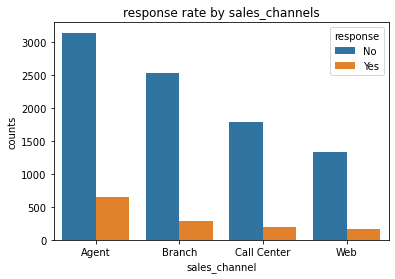

In [28]:
## Sales Channel response rate

response_rate = df.groupby(['response','sales_channel']).size().reset_index(name ='counts')

## Plotting
fig2, ax2 = plt.subplots()

ax2.set_title('response rate by sales_channels')
sns.barplot(x = response_rate['sales_channel'], y = response_rate['counts'], hue = response_rate['response'])

In [25]:
recieved_responses = df['response'].value_counts()       
no_responses = pd.Series(df['response'].isna().sum())

In [26]:
total_responses = recieved_responses.append(no_responses) 
total_responses.index = ['No', 'Yes', 'no-Response'] 

<AxesSubplot:title={'center':'total number of responses'}>

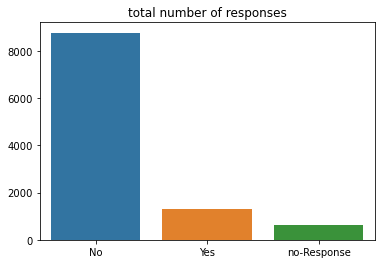

In [27]:
fig1, ax1 = plt.subplots()

ax1.set_title("total number of responses")
sns.barplot(x = total_responses.index, y = total_responses)

In [29]:
coverage_relation = df.groupby(['coverage', 'gender','education', 'marital_status']).size().reset_index(name = 'counts')

<AxesSubplot:title={'center':'response rate by gender'}, xlabel='coverage', ylabel='counts'>

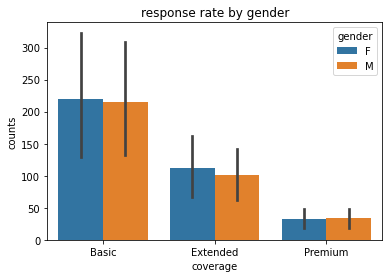

In [30]:
## Plotting

fig3, ax3 = plt.subplots()

ax3.set_title('response rate by gender')
sns.barplot(x = coverage_relation['coverage'], y = coverage_relation['counts'], hue = coverage_relation['gender'])

### Data Transforming

In [31]:
numerical = df.select_dtypes(include = np.number)              
categorical = df.select_dtypes(include = object)               
numerical.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10689 entries, 0 to 10688
Data columns (total 8 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   customer_lifetime_value        10689 non-null  float64
 1   income                         10689 non-null  int64  
 2   monthly_premium_auto           10689 non-null  int64  
 3   months_since_last_claim        10689 non-null  float64
 4   months_since_policy_inception  10689 non-null  int64  
 5   number_of_open_complaints      10689 non-null  float64
 6   number_of_policies             10689 non-null  int64  
 7   total_claim_amount             10689 non-null  float64
dtypes: float64(4), int64(4)
memory usage: 668.2 KB


C:\Users\Basil Paul Thankacha\.conda\envs\DA_env\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='customer_lifetime_value', ylabel='Density'>

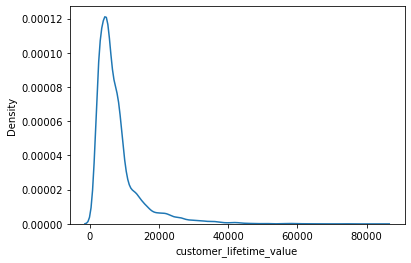

In [33]:
sns.distplot(numerical.customer_lifetime_value,hist=False)

In [34]:
## Normalizing

from sklearn import preprocessing

x = numerical.values #returns a numpy array
min_max_scaler = preprocessing.MinMaxScaler()
x_scaled = min_max_scaler.fit_transform(x)
numerical_normalized = pd.DataFrame(x_scaled)
numerical_normalized.head(10)

,0,1,2,3,4,5,6,7
0,0.035752,0.480381,0.000000,0.200000,0.525253,0.0,1.000,0.101171
1,0.004059,0.000000,0.012658,0.085714,0.262626,0.0,0.000,0.257445
2,0.160264,0.221432,0.164557,0.971429,0.313131,0.0,0.125,0.165875
3,0.250953,0.490873,0.151899,0.285714,0.030303,0.0,0.125,0.167263
4,0.087527,0.236795,0.236287,0.432745,0.313131,0.0,0.750,0.244657
5,0.034966,0.505586,0.000000,0.057143,0.737374,0.0,0.750,0.101171
6,0.038525,0.374121,0.008439,0.228571,1.000000,0.6,0.375,0.099358
7,0.037558,0.872136,0.008439,1.000000,0.454545,0.0,0.250,0.085479
8,0.050251,0.668517,0.392405,0.942857,0.242424,0.0,0.000,0.255467
9,0.186870,0.709745,0.101266,0.542857,0.080808,0.0,0.125,0.140989


In [36]:
sns.distplot(categorical.customer_lifetime_value,hist=False)

AttributeError: 'DataFrame' object has no attribute 'customer_lifetime_value'